In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

p = Path("../data/raw/binance/BTCUSDT/2024-03-29/BTCUSDT_240329-bookTicker-2024-03-29.csv")

df = pd.read_csv(p)
df.head()


,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time
0,4300610509971,70776.4,0.051,70780.0,0.051,1711670400023,1711670400030
1,4300610510626,70776.5,0.031,70780.0,0.051,1711670400026,1711670400031
2,4300613564185,70776.6,0.174,70780.0,0.051,1711670404414,1711670406828
3,4300613579461,70776.6,0.174,70780.0,0.061,1711670404462,1711670406887
4,4300613601461,70776.6,0.174,70780.0,0.010,1711670404517,1711670406931


In [4]:
raw = df.copy()
raw.rename(columns = {"best_bid_price": "bid", "best_bid_qty":"bid_size",
    "best_ask_price":"ask",
    "best_ask_qty":"ask_size",
    "event_time":"time_ms",}, inplace=True)

raw


,update_id,bid,bid_size,ask,ask_size,transaction_time,time_ms
0,4300610509971,70776.4,0.051,70780.0,0.051,1711670400023,1711670400030
1,4300610510626,70776.5,0.031,70780.0,0.051,1711670400026,1711670400031
2,4300613564185,70776.6,0.174,70780.0,0.051,1711670404414,1711670406828
3,4300613579461,70776.6,0.174,70780.0,0.061,1711670404462,1711670406887
4,4300613601461,70776.6,0.174,70780.0,0.010,1711670404517,1711670406931
...,...,...,...,...,...,...,...
358629,4302831608140,69000.7,0.010,71600.0,0.005,1711699426197,1711699426204
358630,4302831610725,65000.0,0.001,71600.0,0.005,1711699426238,1711699426244
358631,4302831615980,65000.0,0.001,72120.0,0.045,1711699426294,1711699426299
358632,4302831620474,55000.0,0.014,72500.0,0.410,1711699426341,1711699426346


In [7]:
if "time_ms" in raw.columns:
    raw["time"] = pd.to_datetime(raw["time_ms"], unit="ms", utc = True)
else:
    start = pd.Timestamp("2024-03-29", tz="UTC")
    raw["time"] = start + pd.to_timedelta(np.arange(len(raw)), unit="ms")

raw.head(10)

,update_id,bid,bid_size,ask,ask_size,transaction_time,time_ms,time
0,4300610509971,70776.4,0.051,70780.0,0.051,1711670400023,1711670400030,2024-03-29 00:00:00.030000+00:00
1,4300610510626,70776.5,0.031,70780.0,0.051,1711670400026,1711670400031,2024-03-29 00:00:00.031000+00:00
2,4300613564185,70776.6,0.174,70780.0,0.051,1711670404414,1711670406828,2024-03-29 00:00:06.828000+00:00
3,4300613579461,70776.6,0.174,70780.0,0.061,1711670404462,1711670406887,2024-03-29 00:00:06.887000+00:00
4,4300613601461,70776.6,0.174,70780.0,0.010,1711670404517,1711670406931,2024-03-29 00:00:06.931000+00:00
5,4300613601463,70776.6,0.174,70777.6,0.051,1711670404517,1711670406931,2024-03-29 00:00:06.931000+00:00
6,4300613603991,70776.6,0.174,70779.9,0.011,1711670404523,1711670406935,2024-03-29 00:00:06.935000+00:00
7,4300613720295,70776.3,0.010,70779.9,0.011,1711670404729,1711670407201,2024-03-29 00:00:07.201000+00:00
8,4300613738339,70776.3,0.010,70777.9,0.051,1711670404795,1711670407255,2024-03-29 00:00:07.255000+00:00
10,4300613742296,70776.3,0.010,70776.7,0.022,1711670404819,1711670407264,2024-03-29 00:00:07.264000+00:00


In [6]:
raw[["bid","ask","bid_size","ask_size"]] = raw[["bid","ask","bid_size","ask_size"]].astype(float)

raw["ask"] > raw["bid"]
raw = raw[raw["ask"] > raw["bid"]].sort_values("time")
raw.head()

,update_id,bid,bid_size,ask,ask_size,transaction_time,time_ms,time
0,4300610509971,70776.4,0.051,70780.0,0.051,1711670400023,1711670400030,2024-03-29 00:00:00.030000+00:00
1,4300610510626,70776.5,0.031,70780.0,0.051,1711670400026,1711670400031,2024-03-29 00:00:00.031000+00:00
2,4300613564185,70776.6,0.174,70780.0,0.051,1711670404414,1711670406828,2024-03-29 00:00:06.828000+00:00
3,4300613579461,70776.6,0.174,70780.0,0.061,1711670404462,1711670406887,2024-03-29 00:00:06.887000+00:00
4,4300613601461,70776.6,0.174,70780.0,0.010,1711670404517,1711670406931,2024-03-29 00:00:06.931000+00:00


In [8]:
df = (raw.set_index("time")[["bid","bid_size","ask","ask_size"]]
          .resample("1S").last().ffill().reset_index())
df.head(), df.shape

/var/folders/xx/w12875ds6blcc9p0ljq82tdw0000gn/T/ipykernel_26641/1985259598.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  .resample("1S").last().ffill().reset_index())


(                       time      bid  bid_size      ask  ask_size
 0 2024-03-29 00:00:00+00:00  70776.5     0.031  70780.0     0.051
 1 2024-03-29 00:00:01+00:00  70776.5     0.031  70780.0     0.051
 2 2024-03-29 00:00:02+00:00  70776.5     0.031  70780.0     0.051
 3 2024-03-29 00:00:03+00:00  70776.5     0.031  70780.0     0.051
 4 2024-03-29 00:00:04+00:00  70776.5     0.031  70780.0     0.051,
 (29027, 5))

In [9]:
df["mid"] = (df["bid"] + df["ask"]) / 2
df["spread"] = df["ask"] - df["bid"]
df["imbalance"] = (df["bid_size"] - df["ask_size"]) / (df["bid_size"] + df["ask_size"]).replace(0, np.nan)
df[["time","bid","ask","mid","spread","imbalance"]].head()

,time,bid,ask,mid,spread,imbalance
0,2024-03-29 00:00:00+00:00,70776.5,70780.0,70778.25,3.5,-0.243902
1,2024-03-29 00:00:01+00:00,70776.5,70780.0,70778.25,3.5,-0.243902
2,2024-03-29 00:00:02+00:00,70776.5,70780.0,70778.25,3.5,-0.243902
3,2024-03-29 00:00:03+00:00,70776.5,70780.0,70778.25,3.5,-0.243902
4,2024-03-29 00:00:04+00:00,70776.5,70780.0,70778.25,3.5,-0.243902


In [35]:
import numpy as np
import pandas as pd

def per_second_targets(Q_total, n_secs):
    base = Q_total // n_secs
    rem  = Q_total % n_secs
    t = np.full(n_secs, base, dtype=float)
    if rem > 0:
        t[:rem] += 1
    return pd.Series(t, index=df.index[:n_secs])

def simulate_aggressive(df, targets, cap_frac=0.20):
    records = []
    for i, (idx, row) in enumerate(df.iterrows()):
        want = targets.iloc[i] if i < len(targets) else 0.0
        if want <= 0:
            records.append((row["time"], "buy", 0.0, np.nan))
            continue
        max_take = cap_frac * max(row["ask_size"], 1e-9)
        got = float(min(want, max_take))
        px  = float(row["ask"])
        records.append((row["time"], "buy", got, px))
    return pd.DataFrame(records, columns=["time","side","qty","price"])

def simulate_passive_then_flip(df, targets, timeout_secs=5, cap_frac=0.20, queue_share=0.25):
    n = len(df)
    fills = []
    remaining = 0.0
    for i in range(n):
        row = df.iloc[i]
        planned = targets.iloc[i] if i < len(targets) else 0.0
        remaining += planned

 
        passive_cap = queue_share * max(row["bid_size"], 1e-9)
        passive_take = float(min(remaining, passive_cap))
        if passive_take > 0:
            fills.append((row["time"], "buy_passive", passive_take, float(row["bid"])))
            remaining -= passive_take

    
        if timeout_secs > 0 and i >= timeout_secs:
            flip_cap = cap_frac * max(row["ask_size"], 1e-9)
            flip_take = float(min(remaining, flip_cap))
            if flip_take > 0:
                fills.append((row["time"], "buy_flip", flip_take, float(row["ask"])))
                remaining -= flip_take

    return pd.DataFrame(fills, columns=["time","side","qty","price"])

def score_metrics(fills, df, horizon_secs=5):
    if fills is None or len(fills) == 0 or fills["qty"].sum() <= 0:
        return {"fills": 0, "fill_rate": 0.0, "CPS": np.nan,
                "SpreadCapture%": np.nan, f"PTM@{horizon_secs}s": np.nan}

    book = df.set_index("time")[["bid","ask","mid"]]
    j = (fills[fills["qty"]>0]
         .merge(book, left_on="time", right_index=True, how="left")).copy()

    j["mid_future"] = book["mid"].shift(-horizon_secs).reindex(j["time"].values).values

    spread = (j["ask"] - j["bid"]).replace(0, np.nan)
    cps = (j["price"] - j["mid"]) * 100.0
    scp = ((j["ask"] - j["price"]) / spread) * 100.0
    ptm = (j["mid_future"] - j["price"]) * 100.0

    w = j["qty"]; wsum = w.sum()
    wavg = (lambda x: float(np.nansum(x*w) / wsum)) if wsum > 0 else (lambda x: np.nan)

    return {"fills": int(len(j)),
            "fill_rate": float(wsum),
            "CPS": wavg(cps),
            "SpreadCapture%": wavg(scp),
            f"PTM@{horizon_secs}s": wavg(ptm)}

targets = per_second_targets(10_000, len(df))

fills_agg = simulate_aggressive(df, targets, cap_frac=0.20)
fills_pas = simulate_passive_then_flip(df, targets, timeout_secs=5, cap_frac=0.20, queue_share=0.25)

print(type(fills_agg), fills_agg.shape)
print(type(fills_pas), fills_pas.shape)
fills_agg.head(), fills_pas.head()

H = 5
summary = pd.DataFrame([
    {"Strategy":"Aggressive",      **score_metrics(fills_agg, df, horizon_secs=H)},
    {"Strategy":"PassiveThenFlip", **score_metrics(fills_pas, df, horizon_secs=H)},
])

print(summary)


<class 'pandas.core.frame.DataFrame'> (29027, 4)
<class 'pandas.core.frame.DataFrame'> (58049, 4)
          Strategy  fills   fill_rate         CPS  SpreadCapture%  PTM@5s
0       Aggressive  10000    98.17020  232.445488        0.000000     0.0
1  PassiveThenFlip  58049  1092.91205  150.635552       61.061752     0.0


In [30]:
Q_TOTAL = float(Q_TOTAL)
def completion_pct(fills): 
    return 100.0 * (0.0 if fills is None or len(fills)==0 else fills["qty"].sum())/Q_TOTAL

summary["Completion%"] = [
    completion_pct(fills_agg),
    completion_pct(fills_pas)
]
summary


,Strategy,fills,fill_rate,CPS,SpreadCapture%,PTM@5s,Completion%
0,Aggressive,10000,98.17020,232.445488,0.000000,0.0,0.981702
1,PassiveThenFlip,58049,1092.91205,150.635552,61.061752,0.0,10.929120


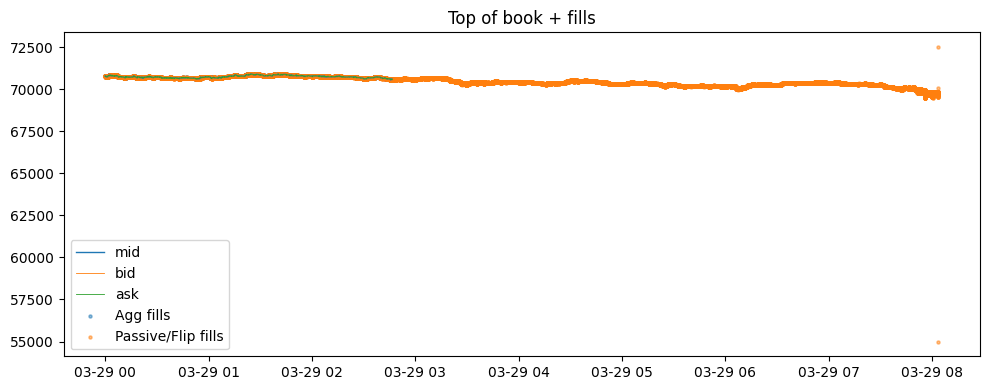

In [36]:
import matplotlib.pyplot as plt

def per_second_targets_float(Q_total, n_secs):
    per = float(Q_total) / float(n_secs)
    t = np.full(n_secs, per, dtype=float)
    t[0] += (Q_total - t.sum())
    return pd.Series(t, index=df.index[:n_secs])


sam = df.iloc[:10_000]  
plt.figure(figsize=(10,4))
plt.plot(sam["time"], sam["mid"], label="mid", linewidth=1)
plt.plot(sam["time"], sam["bid"], label="bid", linewidth=0.6)
plt.plot(sam["time"], sam["ask"], label="ask", linewidth=0.6)

fa = fills_agg.dropna()
fp = fills_pas.dropna()
plt.scatter(fa["time"], fa["price"], s=5, label="Agg fills", alpha=0.5)
plt.scatter(fp["time"], fp["price"], s=5, label="Passive/Flip fills", alpha=0.5)
plt.legend(); plt.title("Top of book + fills"); plt.tight_layout()


results = []
for Q in [0.5, 1.0, 5.0]:             
    targets = per_second_targets_float(Q, len(df))
    for cap in [0.2, 0.3]:
        for qshare in [0.25, 0.4]:
            fa = simulate_aggressive(df, targets, cap_frac=cap)
            fp = simulate_passive_then_flip(df, targets, timeout_secs=5, cap_frac=cap, queue_share=qshare)
            for name, fills in [("Aggressive", fa), ("PassiveThenFlip", fp)]:
                s = score_metrics(fills, df, horizon_secs=5)
                s["Strategy"] = name
                s["Q_TOTAL"] = Q
                s["CAP_FRAC"] = cap
                s["queue_share"] = qshare
                s["Completion%"] = 100.0*(0.0 if len(fills)==0 else fills["qty"].sum())/Q
                results.append(s)

grid = pd.DataFrame(results)
grid.sort_values(["Q_TOTAL","Strategy","CPS"]).head(12)

def vwapy_targets(df, Q_total):
    vol = (df["bid_size"] + df["ask_size"]).clip(lower=1e-9)
    w = vol / vol.sum()
    t = (w * Q_total).values
    t[0] += (Q_total - t.sum())  
    return pd.Series(t, index=df.index[:len(t)])

def simulate_passive_then_smart_flip(df, targets, base_timeout=5, cap_frac=0.20, queue_share=0.25,
                                     tight_spread=1.0, mom_look=3):
    fills, remaining = [], 0.0
    mid = df["mid"].values
    spr = (df["ask"] - df["bid"]).values
    for i, row in enumerate(df.itertuples(index=False)):
        planned = targets.iloc[i] if i < len(targets) else 0.0
        remaining += planned
        passive_cap = queue_share * max(row.bid_size, 1e-9)
        take_p = float(min(remaining, passive_cap))
        if take_p > 0:
            fills.append((row.time, "buy_passive", take_p, float(row.bid)))
            remaining -= take_p
        mom = 0.0
        if i >= mom_look:
            mom = mid[i] - mid[i-mom_look]   

        flip_now = (spr[i] <= tight_spread) or (mom > 0) or (i >= base_timeout)
        if flip_now and remaining > 0:
            flip_cap = cap_frac * max(row.ask_size, 1e-9)
            take_a = float(min(remaining, flip_cap))
            if take_a > 0:
                fills.append((row.time, "buy_flip", take_a, float(row.ask)))
                remaining -= take_a

    return pd.DataFrame(fills, columns=["time","side","qty","price"])

targets_vwapy = vwapy_targets(df, Q_total=1.0)

targets = vwapy_targets(df, Q_total=1.0)
fills_smart = simulate_passive_then_smart_flip(df, targets, base_timeout=5, cap_frac=0.25, queue_share=0.3)
pd.DataFrame([
    {"Strategy":"Aggressive", **score_metrics(simulate_aggressive(df, targets, 0.25), df, 5)},
    {"Strategy":"PassiveThenFlip", **score_metrics(simulate_passive_then_flip(df, targets, 5, 0.25, 0.3), df, 5)},
    {"Strategy":"SmartFlip", **score_metrics(fills_smart, df, 5)},
])

out = grid if "grid" in globals() else summary
out.to_csv("../data/05_results_binance.csv", index=False)
